In [1]:
import os
import pickle
import itertools 
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
warnings.filterwarnings('ignore')

In [2]:
results_path = '../results'

In [3]:
exp_data = [i for i in os.listdir(results_path) if i != '.gitkeep']
exp_data 

['mushrooms',
 'ilpd',
 'banknote',
 'fourclass',
 'svmguide3',
 'transfusion',
 'german_numer',
 'liver-disorders',
 'heart',
 'r2',
 'haberman',
 'svmguide1',
 'breastcancer',
 'australian',
 'diabetes',
 'mammographic',
 'ionosphere',
 'colon-cancer']

### Datasets description

In [4]:
dfs = pd.DataFrame(columns=['instances', 'n_features', 'class_prop'], index=exp_data, data = [])

for exp in exp_data:
    X = pd.read_parquet(f'../data/prep_real_data/{exp}.parquet')
    dfs.loc[exp, 'instances'] = X.shape[0]
    dfs.loc[exp, 'n_features'] = X.shape[1]
    dfs.loc[exp, 'class_prop'] = round(min(X['y'].value_counts()/X.shape[0]), 3)

In [5]:
dfs.sort_index(inplace=True)
dfs

,instances,n_features,class_prop
australian,690,15,0.445
banknote,1372,5,0.445
breastcancer,569,31,0.373
colon-cancer,62,2001,0.355
diabetes,768,9,0.349
fourclass,862,3,0.356
german_numer,1000,25,0.3
haberman,306,4,0.265
heart,270,14,0.444
ilpd,579,11,0.285


### Experiments average results

In [6]:
df_results = pd.DataFrame(index = exp_data, columns = ['MOESS SVM', 'MOESS KNN', 'MOESS DT', 'MOE SVM', 'MOE KNN', 'MOE DT', 'SVM', 'KNN', 'Random Forest'])

In [7]:
models_names = ['MOESS_svm.p', 'MOESS_knn.p', 'MOESS_dt.p','OverfittedEnsemble.p', 'MOE_knn.p', 'MOE_dt.p', 'knn.p', 'svm.p', 'randomforest.p']

for exp in exp_data:
    scores = []
    for model in models_names:
        # try:
        with open('/'.join(['/'.join([results_path, exp]), model]), 'rb') as fin:
                model = pickle.load(fin)
                scores.append(' ('.join([str(round(elem, 3))  for elem in model.best_score_] ) + ')')
        # except:
        #     scores.append(None)
    df_results.loc[exp, :] = scores

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
df_results

,MOESS SVM,MOESS KNN,MOESS DT,MOE SVM,MOE KNN,MOE DT,SVM,KNN,Random Forest
mushrooms,1.0 (0.0),1.0 (0.001),1.0 (0.0),1.0 (0.001),1.0 (0.001),1.0 (0.001),1.0 (0.0),1.0 (0.0),1.0 (0.0)
ilpd,0.641 (0.055),0.636 (0.061),0.68 (0.059),0.662 (0.062),0.643 (0.063),0.674 (0.041),0.625 (0.086),0.626 (0.055),0.618 (0.049)
banknote,1.0 (0.0),0.993 (0.017),0.975 (0.027),1.0 (0.0),0.999 (0.002),0.99 (0.009),0.999 (0.003),1.0 (0.0),0.995 (0.005)
fourclass,0.999 (0.004),0.996 (0.006),0.973 (0.016),1.0 (0.0),1.0 (0.0),0.99 (0.009),1.0 (0.0),1.0 (0.0),0.998 (0.005)
svmguide3,0.736 (0.033),0.69 (0.043),0.734 (0.05),0.754 (0.035),0.697 (0.041),0.77 (0.072),0.708 (0.056),0.767 (0.043),0.767 (0.062)
transfusion,0.68 (0.061),0.676 (0.064),0.679 (0.056),0.68 (0.042),0.679 (0.056),0.69 (0.061),0.657 (0.04),0.676 (0.048),0.617 (0.068)
german_numer,0.716 (0.055),0.673 (0.047),0.725 (0.043),0.716 (0.04),0.688 (0.038),0.71 (0.04),0.633 (0.042),0.713 (0.027),0.706 (0.027)
liver-disorders,0.743 (0.108),0.735 (0.069),0.775 (0.078),0.748 (0.058),0.752 (0.055),0.765 (0.086),0.715 (0.133),0.724 (0.084),0.762 (0.094)
heart,0.863 (0.051),0.855 (0.037),0.849 (0.054),0.868 (0.056),0.861 (0.066),0.85 (0.065),0.834 (0.07),0.854 (0.059),0.844 (0.072)
r2,0.786 (0.124),0.765 (0.077),0.766 (0.087),0.777 (0.121),0.731 (0.164),0.78 (0.101),0.722 (0.17),0.77 (0.15),0.761 (0.096)


### Algorithms comparison

In [9]:
def rank_matrix(df_rank, proportion=False):
    col_comb = list(itertools.combinations(df_mean.columns.values, 2))
    win_loss_df = pd.DataFrame(index = ['MOESS SVM', 'MOESS KNN', 'MOESS DT', 'MOE SVM', 'MOE KNN', 'MOE DT', 'SVM', 'KNN', 'Random Forest'], 
                               columns = ['MOESS SVM', 'MOESS KNN', 'MOESS DT', 'MOE SVM', 'MOE KNN', 'MOE DT', 'SVM', 'KNN', 'Random Forest'])
    if proportion==True:
        prop=df_rank.shape[0]
    else:
        prop=1
    for i, j in col_comb:
        win = str(round(sum(df_rank[i] > df_rank[j])/prop, 2))
        tie = str(round(sum(df_rank[i] == df_rank[j])/prop, 2))
        loss = str(round(sum(df_rank[i] < df_rank[j])/prop, 2))
        win_loss_df.loc[i, j] = '-'.join([win, tie, loss])
    return win_loss_df

In [10]:
df_mean = pd.DataFrame(index = exp_data, columns = ['MOESS SVM', 'MOESS KNN', 'MOESS DT', 'MOE SVM', 'MOE KNN', 'MOE DT', 'SVM', 'KNN', 'Random Forest'])

In [11]:
models_names = ['MOESS_svm.p', 'MOESS_knn.p', 'MOESS_dt.p','OverfittedEnsemble.p', 'MOE_knn.p', 'MOE_dt.p', 'knn.p', 'svm.p', 'randomforest.p']

for exp in exp_data:
    scores = []
    for model in models_names:
        try:
            with open('/'.join(['/'.join([results_path, exp]), model]), 'rb') as fin:
                    scores.append(round(pickle.load(fin).best_score_[0], 3))
        except:
            scores.append(None)
    df_mean.loc[exp, :] = scores

In [12]:
df_mean

,MOESS SVM,MOESS KNN,MOESS DT,MOE SVM,MOE KNN,MOE DT,SVM,KNN,Random Forest
mushrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ilpd,0.641,0.636,0.68,0.662,0.643,0.674,0.625,0.626,0.618
banknote,1.0,0.993,0.975,1.0,0.999,0.99,0.999,1.0,0.995
fourclass,0.999,0.996,0.973,1.0,1.0,0.99,1.0,1.0,0.998
svmguide3,0.736,0.69,0.734,0.754,0.697,0.77,0.708,0.767,0.767
transfusion,0.68,0.676,0.679,0.68,0.679,0.69,0.657,0.676,0.617
german_numer,0.716,0.673,0.725,0.716,0.688,0.71,0.633,0.713,0.706
liver-disorders,0.743,0.735,0.775,0.748,0.752,0.765,0.715,0.724,0.762
heart,0.863,0.855,0.849,0.868,0.861,0.85,0.834,0.854,0.844
r2,0.786,0.765,0.766,0.777,0.731,0.78,0.722,0.77,0.761


In [13]:
rank_matrix(df_mean, proportion=True)

,MOESS SVM,MOESS KNN,MOESS DT,MOE SVM,MOE KNN,MOE DT,SVM,KNN,Random Forest
MOESS SVM,NaN,0.89-0.06-0.06,0.33-0.44-0.22,0.17-0.28-0.56,0.67-0.06-0.28,0.44-0.11-0.44,0.83-0.06-0.11,0.61-0.11-0.28,0.56-0.06-0.39
MOESS KNN,NaN,NaN,0.22-0.06-0.72,0.11-0.06-0.83,0.11-0.17-0.72,0.22-0.06-0.72,0.67-0.06-0.28,0.33-0.11-0.56,0.39-0.06-0.56
MOESS DT,NaN,NaN,NaN,0.28-0.11-0.61,0.61-0.11-0.28,0.39-0.06-0.56,0.78-0.06-0.17,0.5-0.06-0.44,0.5-0.06-0.44
MOE SVM,NaN,NaN,NaN,NaN,0.78-0.11-0.11,0.33-0.11-0.56,0.89-0.11-0.0,0.61-0.22-0.17,0.72-0.06-0.22
MOE KNN,NaN,NaN,NaN,NaN,NaN,0.28-0.06-0.67,0.67-0.17-0.17,0.39-0.11-0.5,0.5-0.06-0.44
MOE DT,NaN,NaN,NaN,NaN,NaN,NaN,0.78-0.06-0.17,0.56-0.11-0.33,0.61-0.11-0.28
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06-0.11-0.83,0.39-0.06-0.56
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61-0.22-0.17
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
rank_matrix(df_mean, proportion=False)

,MOESS SVM,MOESS KNN,MOESS DT,MOE SVM,MOE KNN,MOE DT,SVM,KNN,Random Forest
MOESS SVM,NaN,16.0-1.0-1.0,6.0-8.0-4.0,3.0-5.0-10.0,12.0-1.0-5.0,8.0-2.0-8.0,15.0-1.0-2.0,11.0-2.0-5.0,10.0-1.0-7.0
MOESS KNN,NaN,NaN,4.0-1.0-13.0,2.0-1.0-15.0,2.0-3.0-13.0,4.0-1.0-13.0,12.0-1.0-5.0,6.0-2.0-10.0,7.0-1.0-10.0
MOESS DT,NaN,NaN,NaN,5.0-2.0-11.0,11.0-2.0-5.0,7.0-1.0-10.0,14.0-1.0-3.0,9.0-1.0-8.0,9.0-1.0-8.0
MOE SVM,NaN,NaN,NaN,NaN,14.0-2.0-2.0,6.0-2.0-10.0,16.0-2.0-0.0,11.0-4.0-3.0,13.0-1.0-4.0
MOE KNN,NaN,NaN,NaN,NaN,NaN,5.0-1.0-12.0,12.0-3.0-3.0,7.0-2.0-9.0,9.0-1.0-8.0
MOE DT,NaN,NaN,NaN,NaN,NaN,NaN,14.0-1.0-3.0,10.0-2.0-6.0,11.0-2.0-5.0
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0-2.0-15.0,7.0-1.0-10.0
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0-4.0-3.0
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis of MOESS hyper-parameters

### MOESS SVM

In [15]:
params_df_svm = pd.DataFrame(index = exp_data, columns=['WRAB', 'lambda', 'N. Learners', 'P. Sample'])

In [17]:
for exp in exp_data:
    with open('/'.join(['/'.join([results_path, exp]), 'MOESS_svm.p']), 'rb') as fin:
        params = pickle.load(fin).best_params_
        params_df_svm.loc[exp, 'WRAB'] = params['wrab']
        params_df_svm.loc[exp, 'lambda'] = params['lam']
        params_df_svm.loc[exp, 'N. Learners'] = params['n_learners']
        params_df_svm.loc[exp, 'P. Sample'] = params['prop_sample']

In [18]:
# params_df_svm.loc['transfusion', 'P. Sample'] = 0.1
params_df_svm['lambda'] = params_df_svm['lambda'].astype(int)
params_df_svm['N. Learners'] = params_df_svm['N. Learners'].astype(int)
params_df_svm['P. Sample'] = params_df_svm['P. Sample'].astype(float)

In [19]:
params_df_svm.groupby(['lambda'],as_index=False).size()

,lambda,size
0,1,9
1,3,6
2,5,3


In [20]:
params_df_svm.groupby(['WRAB'],as_index=False).size()

,WRAB,size
0,False,5
1,True,13


In [21]:
params_df_svm.groupby(['N. Learners'],as_index=False).size()

,N. Learners,size
0,10,3
1,20,3
2,30,12


In [22]:
params_df_svm.groupby(['P. Sample'],as_index=False).size()

,P. Sample,size
0,0.1,5
1,0.2,4
2,0.3,9


In [23]:
params_df_svm

,WRAB,lambda,N. Learners,P. Sample
mushrooms,True,1,30,0.3
ilpd,True,5,30,0.1
banknote,False,1,30,0.3
fourclass,False,1,10,0.2
svmguide3,True,3,30,0.2
transfusion,True,3,30,0.1
german_numer,True,5,20,0.3
liver-disorders,True,1,30,0.2
heart,True,1,20,0.2
r2,False,3,10,0.3


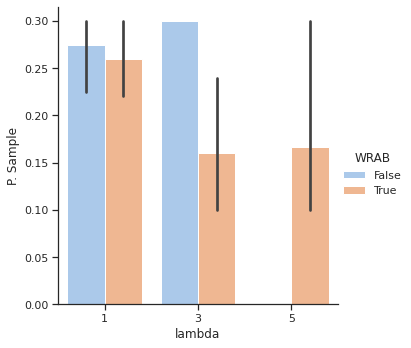

In [24]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_svm);

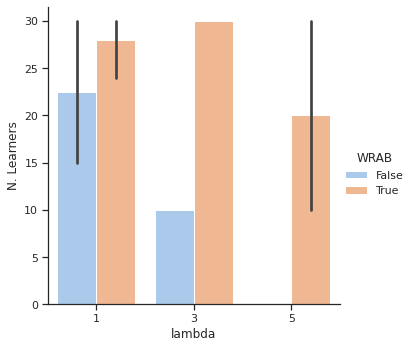

In [25]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_svm);

### MOESS DT

In [29]:
params_df_dt = pd.DataFrame(index = exp_data, columns=['WRAB', 'lambda', 'N. Learners', 'P. Sample'])

In [31]:
for exp in exp_data:
    with open('/'.join(['/'.join([results_path, exp]), 'MOESS_dt.p']), 'rb') as fin:
        params = pickle.load(fin).best_params_
        params_df_dt.loc[exp, 'WRAB'] = params['wrab']
        params_df_dt.loc[exp, 'lambda'] = params['lam']
        params_df_dt.loc[exp, 'N. Learners'] = params['n_learners']
        params_df_dt.loc[exp, 'P. Sample'] = params['prop_sample']

In [32]:
params_df_dt['lambda'] = params_df_dt['lambda'].astype(int)
params_df_dt['N. Learners'] = params_df_dt['N. Learners'].astype(int)
params_df_dt['P. Sample'] = params_df_dt['P. Sample'].astype(float)

In [33]:
params_df_dt.groupby(['lambda'],as_index=False).size()

,lambda,size
0,1,13
1,3,4
2,5,1


In [34]:
params_df_dt.groupby(['WRAB'],as_index=False).size()

,WRAB,size
0,False,6
1,True,12


In [35]:
params_df_dt.groupby(['N. Learners'],as_index=False).size()

,N. Learners,size
0,10,3
1,20,4
2,30,11


In [36]:
params_df_dt.groupby(['P. Sample'],as_index=False).size()

,P. Sample,size
0,0.1,7
1,0.2,1
2,0.3,10


In [37]:
params_df_dt

,WRAB,lambda,N. Learners,P. Sample
mushrooms,True,1,20,0.3
ilpd,True,3,30,0.1
banknote,True,1,30,0.3
fourclass,False,1,10,0.3
svmguide3,False,1,10,0.2
transfusion,True,3,30,0.1
german_numer,True,1,30,0.1
liver-disorders,True,1,20,0.3
heart,False,1,30,0.1
r2,False,1,20,0.3


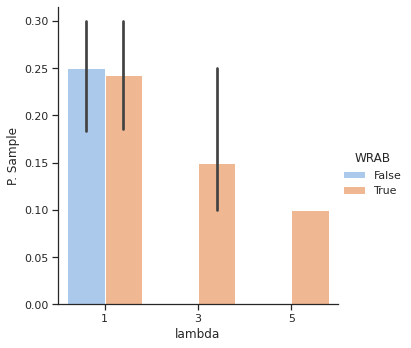

In [38]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_dt);

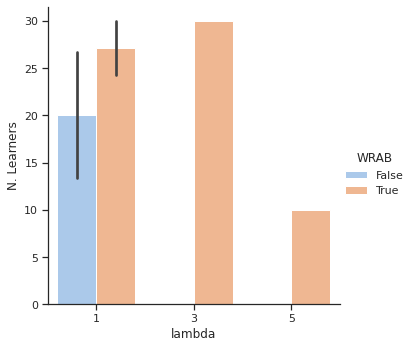

In [39]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_dt);

### MOESS Knn

In [40]:
params_df_knn = pd.DataFrame(index = exp_data, columns=['WRAB', 'lambda', 'N. Learners', 'P. Sample'])

In [42]:
for exp in exp_data:
    with open('/'.join(['/'.join([results_path, exp]), 'MOESS_knn.p']), 'rb') as fin:
        params = pickle.load(fin).best_params_
        params_df_knn.loc[exp, 'WRAB'] = params['wrab']
        params_df_knn.loc[exp, 'lambda'] = params['lam']
        params_df_knn.loc[exp, 'N. Learners'] = params['n_learners']
        params_df_knn.loc[exp, 'P. Sample'] = params['prop_sample']

In [43]:
params_df_knn['lambda'] = params_df_knn['lambda'].astype(int)
params_df_knn['N. Learners'] = params_df_knn['N. Learners'].astype(int)
params_df_knn['P. Sample'] = params_df_knn['P. Sample'].astype(float)

In [44]:
params_df_knn.groupby(['lambda'],as_index=False).size()

,lambda,size
0,1,5
1,3,5
2,5,8


In [45]:
params_df_knn.groupby(['WRAB'],as_index=False).size()

,WRAB,size
0,False,7
1,True,11


In [46]:
params_df_knn.groupby(['N. Learners'],as_index=False).size()

,N. Learners,size
0,10,5
1,20,6
2,30,7


In [47]:
params_df_knn.groupby(['P. Sample'],as_index=False).size()

,P. Sample,size
0,0.1,4
1,0.2,3
2,0.3,11


In [48]:
params_df_knn

,WRAB,lambda,N. Learners,P. Sample
mushrooms,False,1,30,0.3
ilpd,True,5,30,0.3
banknote,True,1,10,0.3
fourclass,False,1,10,0.3
svmguide3,False,5,30,0.3
transfusion,True,5,10,0.2
german_numer,True,3,30,0.1
liver-disorders,False,5,20,0.2
heart,True,5,20,0.2
r2,False,1,10,0.1


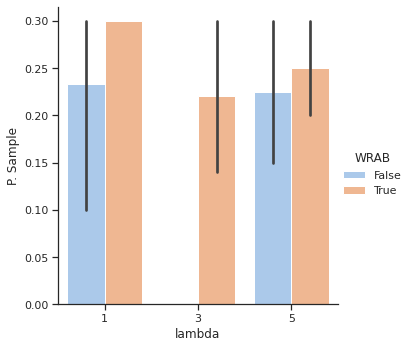

In [49]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_knn);

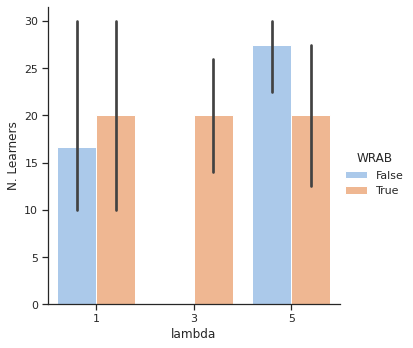

In [50]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_knn);